In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ExtremeLearningMAchine as elm
import itertools
import datacontrol

In [4]:
models = [[100], [500], [1000], [2000]]
alpha = [0.1, 1, 5, 10]
activation = ["relu", "sigmoid"]
TrainingData = datacontrol.readFile("../data/Development.csv")
X, Y = datacontrol.divide(TrainingData)

In [5]:
results = []
# grid search along different type of networks and activation function and alpha
for i in itertools.product(models, alpha, activation):
    print(i)
    ellm = elm.elm(NetworArchitecture = i[0], activation = i[2] ,alpha = i[1])
    val, train = ellm.trainCV(X, Y)
    results.append([*val, *train, i[0], i[1], i[2]])
newresults = []
#convert the results
for i in results:
    newresults.append([np.mean(np.array(i[:4])),np.mean(np.array(i[5:9])),np.std(np.array(i[:4])),  i[10], i[11], i[12]])
df = pd.DataFrame(newresults)
df = df.rename(index=str, columns={0: "mean Validation Error", 3: "Architecture", 4:"alpha", 5:"Activation Function" })
df.to_csv("../result/EMLHeatMap.csv")

([100], 0.1, 'relu')
Mean validation: 1.09 +- 0.023
Mean training: 1.05 +- 0.011
Time: 0.22
([100], 0.1, 'sigmoid')
Mean validation: 1.36 +- 0.033
Mean training: 1.35 +- 0.005
Time: 0.20
([100], 1, 'relu')
Mean validation: 1.12 +- 0.021
Mean training: 1.09 +- 0.004
Time: 0.21
([100], 1, 'sigmoid')
Mean validation: 1.41 +- 0.026
Mean training: 1.40 +- 0.006
Time: 0.20
([100], 5, 'relu')
Mean validation: 1.18 +- 0.024
Mean training: 1.16 +- 0.006
Time: 0.21
([100], 5, 'sigmoid')
Mean validation: 1.45 +- 0.030
Mean training: 1.45 +- 0.010
Time: 0.20
([100], 10, 'relu')
Mean validation: 1.21 +- 0.020
Mean training: 1.18 +- 0.012
Time: 0.20
([100], 10, 'sigmoid')
Mean validation: 1.50 +- 0.034
Mean training: 1.49 +- 0.010
Time: 0.22
([500], 0.1, 'relu')
Mean validation: 1.08 +- 0.013
Mean training: 0.91 +- 0.013
Time: 0.32
([500], 0.1, 'sigmoid')
Mean validation: 1.24 +- 0.027
Mean training: 1.23 +- 0.013
Time: 0.29
([500], 1, 'relu')
Mean validation: 1.04 +- 0.013
Mean training: 0.98 +- 0.

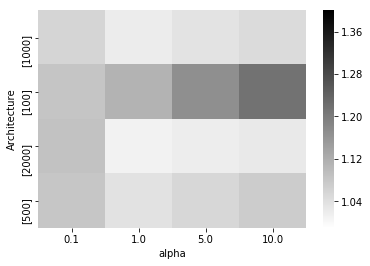

In [43]:
df = pd.read_csv("../result/EMLHeatMap.csv")
df = df.loc[df["Activation Function"] == "relu"]
df = df.pivot("Architecture", "alpha", "mean Validation Error")
ax = sns.heatmap(df, cmap="binary", vmin=0.99, vmax = 1.4)

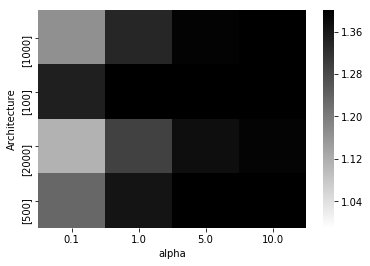

In [44]:
df = pd.read_csv("../result/EMLHeatMap.csv")
df = df.loc[df["Activation Function"] == "sigmoid"]
df = df.pivot("Architecture", "alpha", "mean Validation Error")
ax = sns.heatmap(df, cmap="binary", vmin=0.99, vmax = 1.4)

NOW SECOND GRID SEARCH FOR THE BETTER NETWORK ARCHITECTURE WE HAVE FOUND

In [45]:
models = [[2000]]
alpha = np.linspace(0.1, 5, 100)
activation = ["relu"]
TrainingData = datacontrol.readFile("../data/Development.csv")
X, Y = datacontrol.divide(TrainingData)

In [46]:
results = []
# grid search along different type of networks and activation function and alpha
for i in itertools.product(models, alpha, activation):
    print(i)
    ellm = elm.elm(NetworArchitecture = i[0], activation = i[2] ,alpha = i[1])
    val, train = ellm.trainCV(X, Y)
    results.append([*val, *train, i[0], i[1], i[2]])
newresults = []
#convert the results
for i in results:
    newresults.append([np.mean(np.array(i[:4])),np.mean(np.array(i[5:9])),np.std(np.array(i[:4])),  i[10], i[11], i[12]])
df = pd.DataFrame(newresults)
df = df.rename(index=str, columns={0: "mean Validation Error", 3: "Architecture", 4:"alpha", 5:"Activation Function" })
df.to_csv("../result/ELMSearchForAlpha.csv")

([2000], 0.1, 'relu')
Mean validation: 1.08 +- 0.020
Mean training: 0.71 +- 0.007
Time: 1.97
([2000], 0.14949494949494951, 'relu')
Mean validation: 1.04 +- 0.028
Mean training: 0.74 +- 0.009
Time: 1.98
([2000], 0.198989898989899, 'relu')
Mean validation: 1.03 +- 0.015
Mean training: 0.77 +- 0.004
Time: 1.99
([2000], 0.2484848484848485, 'relu')
Mean validation: 1.03 +- 0.015
Mean training: 0.78 +- 0.006
Time: 1.91
([2000], 0.297979797979798, 'relu')
Mean validation: 1.02 +- 0.014
Mean training: 0.79 +- 0.005
Time: 2.13
([2000], 0.3474747474747475, 'relu')
Mean validation: 1.02 +- 0.022
Mean training: 0.80 +- 0.008
Time: 2.11
([2000], 0.396969696969697, 'relu')
Mean validation: 1.01 +- 0.019
Mean training: 0.81 +- 0.008
Time: 1.96
([2000], 0.44646464646464656, 'relu')
Mean validation: 1.03 +- 0.017
Mean training: 0.82 +- 0.009
Time: 2.05
([2000], 0.49595959595959604, 'relu')
Mean validation: 1.02 +- 0.025
Mean training: 0.83 +- 0.008
Time: 1.97
([2000], 0.5454545454545455, 'relu')
Mean v

Mean validation: 1.02 +- 0.025
Mean training: 0.94 +- 0.003
Time: 2.02
([2000], 3.911111111111112, 'relu')
Mean validation: 1.02 +- 0.025
Mean training: 0.95 +- 0.008
Time: 2.03
([2000], 3.9606060606060614, 'relu')
Mean validation: 1.02 +- 0.024
Mean training: 0.95 +- 0.004
Time: 2.03
([2000], 4.01010101010101, 'relu')
Mean validation: 1.02 +- 0.022
Mean training: 0.95 +- 0.007
Time: 2.12
([2000], 4.05959595959596, 'relu')
Mean validation: 1.02 +- 0.027
Mean training: 0.95 +- 0.007
Time: 1.97
([2000], 4.109090909090909, 'relu')
Mean validation: 1.02 +- 0.020
Mean training: 0.95 +- 0.007
Time: 1.93
([2000], 4.158585858585859, 'relu')
Mean validation: 1.02 +- 0.020
Mean training: 0.95 +- 0.008
Time: 2.36
([2000], 4.208080808080808, 'relu')
Mean validation: 1.02 +- 0.022
Mean training: 0.95 +- 0.005
Time: 2.21
([2000], 4.257575757575758, 'relu')
Mean validation: 1.02 +- 0.019
Mean training: 0.95 +- 0.005
Time: 2.06
([2000], 4.307070707070707, 'relu')
Mean validation: 1.02 +- 0.022
Mean tr

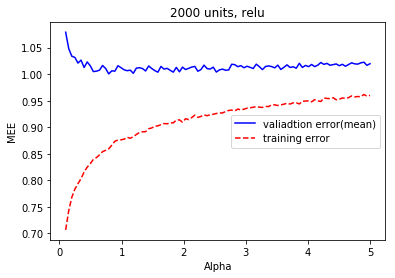

In [52]:
import matplotlib.pyplot as plt
df = pd.read_csv("../result/ELMSearchForAlpha.csv")
plt.plot(df["alpha"], df["mean Validation Error"], '-b', label='valiadtion error(mean)')
plt.plot(df["alpha"], df["1"], '--r', label='training error')
plt.xlabel("Alpha")
plt.ylabel("MEE")
plt.title("2000 units, relu")
plt.legend(loc = 'center right')

In [58]:
df.sort_values("mean Validation Error")

,Unnamed: 0,mean Validation Error,1,2,Architecture,alpha,Activation Function
14,14,1.000488,0.859364,0.029281,[2000],0.792929,relu
22,22,1.001605,0.882181,0.028373,[2000],1.188889,relu
30,30,1.003666,0.902639,0.025568,[2000],1.584848,relu
35,35,1.003728,0.908224,0.025404,[2000],1.832323,relu
49,49,1.003959,0.925865,0.025947,[2000],2.525253,relu
37,37,1.004348,0.913962,0.031273,[2000],1.931313,relu
9,9,1.004854,0.839487,0.036727,[2000],0.545455,relu
43,43,1.005426,0.918605,0.020402,[2000],2.228283,relu
10,10,1.005562,0.842796,0.023678,[2000],0.594949,relu
16,16,1.005605,0.873649,0.027858,[2000],0.891919,relu
